<a href="https://colab.research.google.com/github/Adityavdwiv/DataAnalysisGroupProjects/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

heart_df = pd.read_csv("https://raw.githubusercontent.com/Adityavdwiv/DataAnalysisGroupProjects/main/project3/heart.csv")
student_df = pd.read_csv("https://raw.githubusercontent.com/Adityavdwiv/DataAnalysisGroupProjects/main/project3/student-mat.csv")
train_df = pd.read_csv("https://raw.githubusercontent.com/Adityavdwiv/DataAnalysisGroupProjects/main/project3/train.csv")


In [9]:
# 🔍 EDA Function
def explore_dataset(df, name, target_col):
    print(f"\n📘 Dataset: {name}")
    print(df.shape)
    print(df.info())
    print(df.describe())

    # Value counts for target
    print("\n🎯 Target Distribution:")
    print(df[target_col].value_counts())

    # Plot class balance
    sns.countplot(data=df, x=target_col)
    plt.title(f"{name} - Target Distribution")
    plt.show()

    # Missing values heatmap
    print("\n🧼 Missing Values:")
    print(df.isna().sum())
    sns.heatmap(df.isna(), cbar=False)
    plt.title(f"{name} - Missing Values")
    plt.show()

    # Correlation matrix (numerical only)
    numeric_cols = df.select_dtypes(include='number').columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"{name} - Correlation Heatmap")
    plt.show()


📘 Dataset: Heart Disease
(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  13

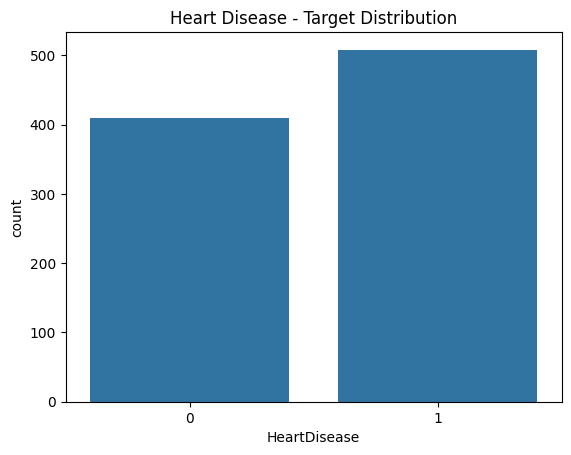


🧼 Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


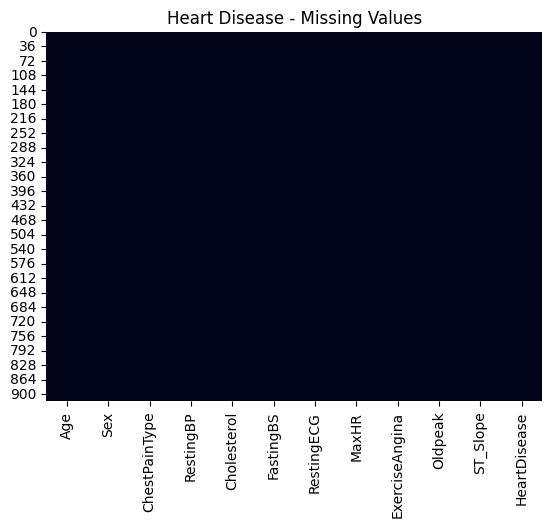

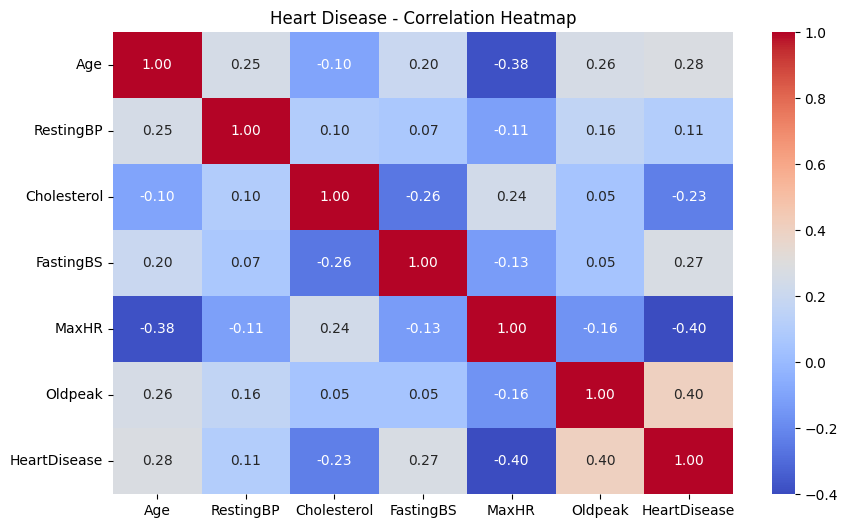


📘 Dataset: Student Data
(395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395

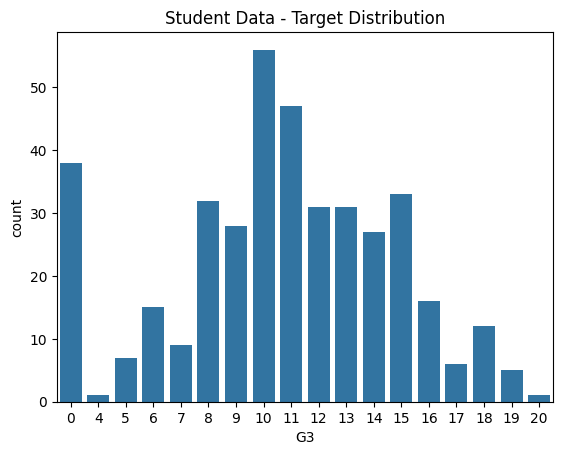


🧼 Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


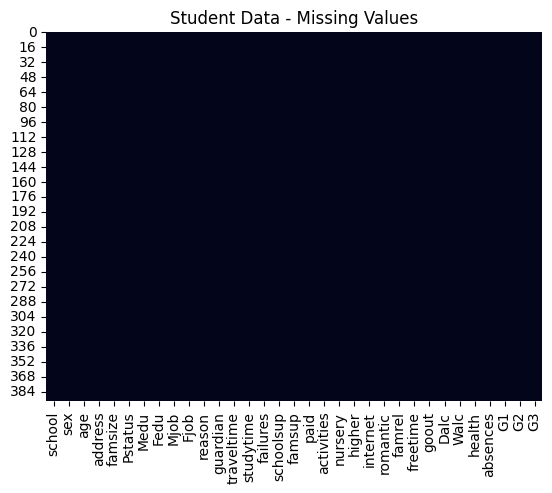

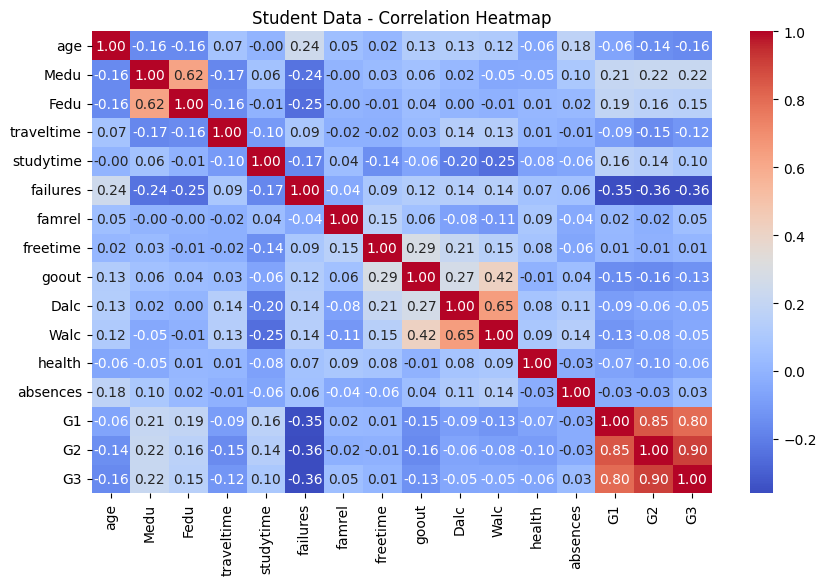


📘 Dataset: Train Dataset
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523

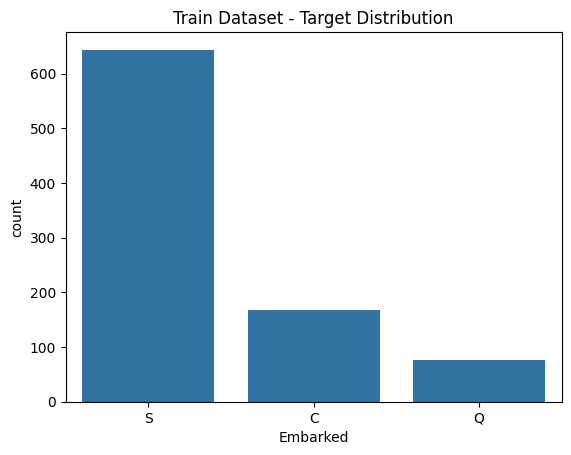


🧼 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


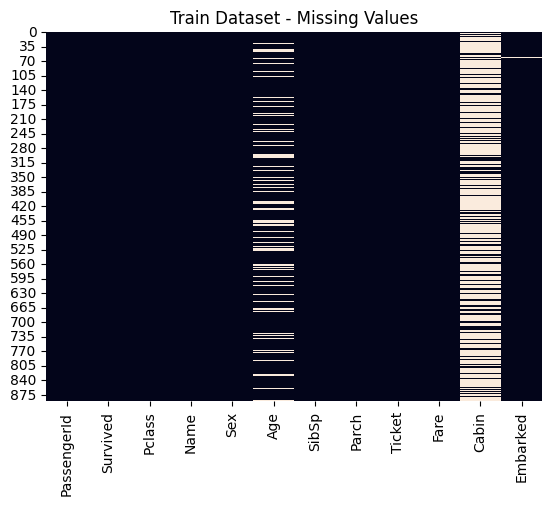

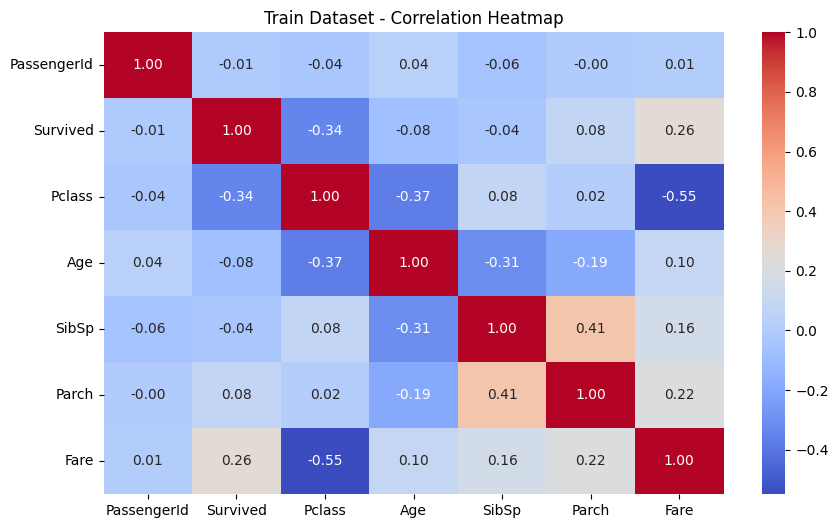

In [10]:
# Run EDA
explore_dataset(heart_df, "Heart Disease", "HeartDisease")
explore_dataset(student_df, "Student Data", "G3")  # G3 = final grade
explore_dataset(train_df, "Train Dataset", train_df.columns[-1])  # guessing last column is target


In [11]:
# 🧹 Cleaning & Preprocessing Function
def clean_dataset(df):
    df = df.copy()

    # 1. Fill missing numeric with median
    for col in df.select_dtypes(include='number').columns:
        df[col].fillna(df[col].median(), inplace=True)

    # 2. Fill missing categorical with mode
    for col in df.select_dtypes(include='object').columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # 3. Encode categorical variables
    df = pd.get_dummies(df, drop_first=True)

    # 4. Scale numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df

In [12]:
# Clean all three datasets
heart_clean = clean_dataset(heart_df)
student_clean = clean_dataset(student_df)
train_clean = clean_dataset(train_df)

/tmp/ipython-input-11-2540804868.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-11-2540804868.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [14]:
# 💾 Save cleaned CSVs (optional if you're running locally)
heart_clean.to_csv("heart_cleaned.csv", index=False)
student_clean.to_csv("student_cleaned.csv", index=False)
train_clean.to_csv("train_cleaned.csv", index=False)

print("✅ All datasets cleaned and ready for SHAP/LIME analysis.")

✅ All datasets cleaned and ready for SHAP/LIME analysis.
